<a href="https://colab.research.google.com/github/aahFancyGun/dataScienceClass/blob/master/unit9/YangChauUnit9Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<font face="times" size=100px color='blue' font-style='bold'> Unit 9 Project: Predicting Nuclear Energy Trends <font>

<font face="times" size=5px color='blue' font-style='bold'> Part 3: Nuclear Neurons <font>


# Introduction

This project will attempt to predict nuclear energy generation based on capacity factor using a neural network based approach. According to a previous project from unt 8, capacity factor was determined to be the most important variable for predicting how much electricity could be generated.

- Given that neural networks have the highest potential this project may potentily be able to yield the most usable model yet

## Credits

The majority of the code in this project was copied from Mr. Arredondo's unit 9 notes with a few changes in variable names to suit my project more.

## Data

The data used will be identical to the previous unit 8 project but instead of making multiple models using different variables and predictors I will use only capacity factor to predict Electricity Generated.

In [64]:
url = "https://raw.githubusercontent.com/aahFancyGun/dataScienceClass/master/unit7/nuclear_energy_overview_eia.csv"

data = pd.read_csv(url)[264:] #reading data

data = data.rename(columns={
    'Year': 'Year',
    'Month': 'Month',
    'Nuclear_Generating_Units_Total__Operable_Units': 'Operable_Units',
    'Nuclear_Generating_Units_Net_Summer_Capacity': 'Summer_Capacity_MW',
    'Nuclear_Electricity_Net_Generation': 'Electricity_Generated_MWh',
    'Nuclear_Share_of_Electricity_Net_Generation': 'Electricity_Share_Percent',
    'Nuclear_Generating_Units_Capacity_Factor': 'Capacity_Factor'
})

data = data[["Electricity_Generated_MWh", "Operable_Units", "Summer_Capacity_MW", "Electricity_Share_Percent", "Capacity_Factor"]] # important columns are change and the five factors

# Convert relevant columns to numeric, coercing errors to NaN
for col in ["Electricity_Generated_MWh", "Operable_Units", "Summer_Capacity_MW", "Electricity_Share_Percent", "Capacity_Factor"]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle potential NaN values (example: fill with mean, you might choose a different strategy)
data = data.fillna(data.mean())

data #printing data


,Electricity_Generated_MWh,Operable_Units,Summer_Capacity_MW,Electricity_Share_Percent,Capacity_Factor
264,63342,109,99.148,22.6,85.9
265,51858,109,99.148,20.6,77.8
266,51880,109,99.148,19.9,70.3
267,49321,109,99.148,20.2,69.2
268,54387,109,99.148,20.6,73.7
...,...,...,...,...,...
609,61403,93,95.746,18.6,86.2
610,62258,93,95.746,19.3,90.3
611,68898,93,95.746,19.9,96.7
612,69080,93,95.723,18.2,97.1


In [65]:
#convert to numpy array
matrix = data.to_numpy()
#convert to a PyTorch tensor
tensor = torch.from_numpy(matrix)

print(tensor) #the default data type is a float
#the dimensions of our tensor/matrix--this will be of vital importance.
print(tensor.shape)

tensor([[6.3342e+04, 1.0900e+02, 9.9148e+01, 2.2600e+01, 8.5900e+01],
        [5.1858e+04, 1.0900e+02, 9.9148e+01, 2.0600e+01, 7.7800e+01],
        [5.1880e+04, 1.0900e+02, 9.9148e+01, 1.9900e+01, 7.0300e+01],
        ...,
        [6.8898e+04, 9.3000e+01, 9.5746e+01, 1.9900e+01, 9.6700e+01],
        [6.9080e+04, 9.3000e+01, 9.5723e+01, 1.8200e+01, 9.7100e+01],
        [6.4584e+04, 9.3000e+01, 9.5723e+01, 2.0200e+01, 9.6900e+01]],
       dtype=torch.float64)
torch.Size([350, 5])


## Generating Model

Neural networks have a multitude of customizable settings that allow a developer to fine tune their model to their problem. This amount of control means that the model can be extremely specialized to a problem and very capable at it but at the same time relies heavily on the developer to configure it properly.
- For this model, the majority of the settings remain unchanged from Mr. Arredondo's notes with a few exceptions
  - the rate at which the model optimizes is several orders of magnitudes smaller
  - testing set size has been changed to 10% of the total data to reflect the relatively small amount of information this data set gives me (only 350 rows)
  - The structure of the model has been modified (numbers of layers and number of neurons per layer)

In [66]:
#convert to a PyTorch tensor
Electricity_Generated_MWh = data['Capacity_Factor'].to_numpy()
Electricity_Generated_MWh = torch.from_numpy(Electricity_Generated_MWh)
c_factor = data["Capacity_Factor"].to_numpy()
c_factor = torch.from_numpy(c_factor)

#Capacity factor as predictor
X = c_factor.unsqueeze(dim=1)

#Total electricity generated is predicted variable
y = Electricity_Generated_MWh.unsqueeze(dim=1)


# dimensions
scaler = StandardScaler()
c_factor_scaled = scaler.fit_transform(
    c_factor.reshape(-1, 1)
    )

# Split data into training and testing sets
training_x, testing_x, training_y, testing_y = train_test_split(
    c_factor_scaled, Electricity_Generated_MWh, test_size=0.1,
)

# cast to tensor
training_x = torch.tensor(training_x, dtype=torch.float32)
training_y = torch.tensor(training_y, dtype=torch.float32)
testing_x = torch.tensor(testing_x, dtype=torch.float32)
testing_y = torch.tensor(testing_y, dtype=torch.float32)

<ipython-input-66-82e546002aa8>:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_y = torch.tensor(training_y, dtype=torch.float32)
<ipython-input-66-82e546002aa8>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testing_y = torch.tensor(testing_y, dtype=torch.float32)


In [73]:
nuclear_model = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Tanh(),
    nn.Linear(in_features=10, out_features=10),
    nn.Tanh(),
    nn.Linear(in_features=10, out_features=5),
    nn.Tanh(),
    nn.Linear(in_features=5, out_features=1)
)

In [74]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=nuclear_model.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [75]:
# Ensure that the input data and target data are in the correct dtype (Float)
training_x = training_x.float()
testing_x = testing_x.float()
training_y = training_y.float()
testing_y = testing_y.float()

# Ensure that the model's parameters are in the correct dtype (Float)
nuclear_model = nuclear_model.float()

## Training the Model



In [76]:
for epoch in range(15000):

    #this allows our matrices to update
    nuclear_model.train()

    # Make predictions
    EG_MWH_pred = nuclear_model(training_x)

    # Calculate loss
    loss = loss_fn(EG_MWH_pred.squeeze(), training_y)

    # resets change in model
    optimizer.zero_grad()

    # determines how to change weights
    loss.backward()

    # changes our weights
    optimizer.step()

    # Evaluation
    nuclear_model.eval()
    with torch.inference_mode():
      # makes predictions, with test data
      test_pred = nuclear_model(testing_x)
      # Calculate loss with test data
      test_loss = loss_fn(test_pred, testing_y)

    if epoch % 500 == 0:
        print(f"Epoch Number: {epoch}, Train Data loss: {loss:.5f}, Test Data loss: {test_loss:.5f}")

Epoch Number: 0, Train Data loss: 7849.70215, Test Data loss: 7887.91992
Epoch Number: 500, Train Data loss: 2678.29834, Test Data loss: 2683.71997
Epoch Number: 1000, Train Data loss: 854.86426, Test Data loss: 844.45520
Epoch Number: 1500, Train Data loss: 306.12173, Test Data loss: 285.87332
Epoch Number: 2000, Train Data loss: 140.96083, Test Data loss: 114.99009
Epoch Number: 2500, Train Data loss: 91.23330, Test Data loss: 62.04045
Epoch Number: 3000, Train Data loss: 76.23026, Test Data loss: 45.27042
Epoch Number: 3500, Train Data loss: 71.63246, Test Data loss: 39.76553
Epoch Number: 4000, Train Data loss: 69.88441, Test Data loss: 37.85746
Epoch Number: 4500, Train Data loss: 41.14170, Test Data loss: 37.45127
Epoch Number: 5000, Train Data loss: 23.35725, Test Data loss: 49.50007
Epoch Number: 5500, Train Data loss: 16.02435, Test Data loss: 58.66648
Epoch Number: 6000, Train Data loss: 11.57810, Test Data loss: 63.13300
Epoch Number: 6500, Train Data loss: 8.48638, Test Dat

In [77]:

# evaluate state
nuclear_model.eval()

# Making predictions
with torch.inference_mode():
    y_preds = nuclear_model(testing_x)

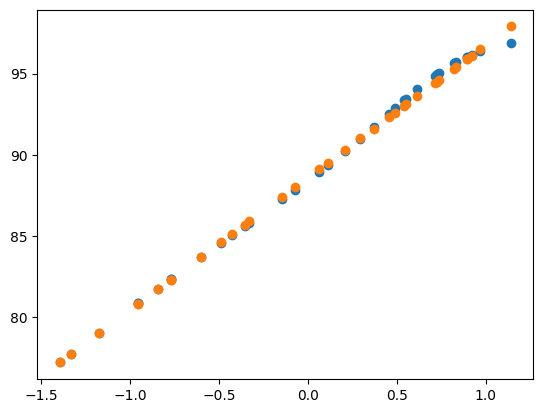

In [78]:
#plot results
plt.scatter(testing_x.detach().numpy(),y_preds.detach().numpy())
plt.scatter(testing_x.detach().numpy(),testing_y.detach().numpy())

# models predictions are blue and data is orange

# Conclusions

As could be predicted by capcity factor's R^2 value in unit 8, which was very close 1, the variable was extremely potent in predicting electricity generated but there was still some fine tuning that went into the above results. One thing that I noticed when fine tuning was that near the end my model tended to plateau, meaning it failed to completely fit the data near the maxima. Because of that, I did a lot of tweaking and iterations in order to maximize the overall linearity of the model's predictions, which resulted in the above graph. And while this graph still does begin to level out near the ends, its not nearly as extreme as some of my first iterations.

##usability

So clearly the neural network is very good at matching the data, but how usable is it beyond the limits of the testing and training data? Well I'm of the opinion that while it's certainly very good at matching data, it probably won't be as good at data points that are further out beyond the reach of it's testing data, which shares a range with the training data. Consequently, I feel that the model's tendency to plateau out near te maxima of the graph is indicative of a weakness in predicting values that go beyond the range of the original set of data.